<img src = "pandas_logo.png">

# <center> Week 3 - Data Manipulation with Pandas</center>

<b>Lemma</b> Every finite set contains its supremum.

Proof: 

+ For the case $A=\{a\}$:

    $A = \{a\}$ is a singleton set, then clearly $\sup A = \max A = a$ .

    Next, assume we know that all sets of cardinality $m - 1$ have a maximal element.


+ Then for the case $1 < |A| < m$:  

    Let $a \in A$ be an arbitrary element and let $A^\prime = A - \{a\}$. 

    Since $A^\prime$ has $m-1$ elements, it has a maximum, denoted by $\max A^\prime = a^\prime$. 

    Then $\max\{a,a^\prime\}$ is the maximal element of $A$.



<b>Proposition</b> EC3389 has a most boring class.

Proof: Follows from above since the set of all EC3389 classes is finite.

<b>Conjecture</b> This is it.

<hr>

In [276]:
import pandas as pd # Our new friend
import numpy as np
%matplotlib inline

## Series and DataFrames

A Series is a <i>one</i>-dimensional array-like object containing:

+ Index column(s) labeling data

+ Data column

<b>Creating Series from Lists and NumPy Arrays</b>

In [595]:
idx = ["a", "b", "c", "d", "e"]                            # Some index 

In [596]:
dt = np.random.uniform(low = 0, high = 10, size = (5,))    # Some 1-dimensional data 
s = pd.Series(data = dt, index = idx)

In [599]:
s

a    1.654845
b    9.749760
c    8.478759
d    3.325079
e    8.087736
dtype: float64

In [600]:
dt = np.random.uniform(low = 0, high = 10, size = (5,4))    # Some multiple dimensional data 
cols = ["col1", "col2", "col3", "col4"]
df = pd.DataFrame(data = dt, index = idx, columns = cols)

In [603]:
df.values

array([[ 0.06963492,  5.312001  ,  8.3260708 ,  8.28363999],
       [ 4.19083137,  1.06791809,  1.6591498 ,  7.24788327],
       [ 0.71967491,  7.09188397,  2.21723453,  0.28885028],
       [ 5.56915698,  4.24344921,  9.04986363,  3.6729041 ],
       [ 5.32635722,  4.22823998,  0.30856106,  2.25623561]])

Alternatively, you can create a DataFrame using dictionaries.

<b>Attributes and Functions</b>

Series and DataFrames come with <i>many</i> useful attributes and built-in functions, several of them inherited from NumPy. Let's take a look at some of them.

Attributes

+ values: NumPy Array

+ index: a pandas Index object

Functions

+ head()

+ tail()

+ mean()

+ std()

+ var()

+ describe()

+ plot()

In [609]:
df

,col1,col2,col3,col4
a,0.069635,5.312001,8.326071,8.283640
b,4.190831,1.067918,1.659150,7.247883
c,0.719675,7.091884,2.217235,0.288850
d,5.569157,4.243449,9.049864,3.672904
e,5.326357,4.228240,0.308561,2.256236


In [616]:
df

,col1,col2,col3,col4
a,0.069635,5.312001,8.326071,8.283640
b,4.190831,1.067918,1.659150,7.247883
c,0.719675,7.091884,2.217235,0.288850
d,5.569157,4.243449,9.049864,3.672904
e,5.326357,4.228240,0.308561,2.256236


<font color ="navy"><b>Index objects</b></font> Index objects also have methods such as append, drop, insert, delete.

In [613]:
idx = df.index

In [617]:
idx.isin(["a", "b"])

array([ True,  True, False, False, False], dtype=bool)

<b>Pandas + NumPy</b>

Because Series and DataFrames are array-like, you can treat them almost like NumPy arrays.

In [32]:
np.log(df)  # FAST elementwise application through NumPy (and in turn through C)

,col1,col2,col3,col4
a,1.685340,0.205083,1.969622,0.294122
b,1.665199,2.145724,1.708712,1.604618
c,-1.527235,1.125705,0.783348,2.255463
d,0.637932,2.117035,0.569742,0.181750
e,1.214424,1.458671,2.190931,2.085142


<b>Reading files a DataFrame</b>

Pandas has can read from several different kinds of files. Try autocompleting from pd.read_...

In [618]:
baby_names = pd.read_csv("baby_names.csv")

In [621]:
baby_names.tail(10)

,name,gender,count,year
1825423,Ziyang,M,5,2014
1825424,Zmarion,M,5,2014
1825425,Zo,M,5,2014
1825426,Zyeir,M,5,2014
1825427,Zyel,M,5,2014
1825428,Zykeem,M,5,2014
1825429,Zymeer,M,5,2014
1825430,Zymiere,M,5,2014
1825431,Zyran,M,5,2014
1825432,Zyrin,M,5,2014


<hr>

## Indexing and selection

### Selecting subsets of a Series

In [622]:
idx = ["a", "b", "c", "d", "a"] #  Now 'a' appears twice
dt = np.random.uniform(low = 0, high = 10, size = (5,))
s = pd.Series(data = dt, index = idx)
s

a    7.493476
b    9.093487
c    7.931124
d    5.015919
a    7.062879
dtype: float64

You can select a subset of a Series by calling the index label

In [623]:
s["b"] 

9.0934874010224718

By calling the index position

In [626]:
s[1]  # This could also be a slice m:n

9.0934874010224718

By using a list (which returns another Series)

In [627]:
s

a    7.493476
b    9.093487
c    7.931124
d    5.015919
a    7.062879
dtype: float64

In [625]:
s[["a","b"]]

a    7.493476
a    7.062879
b    9.093487
dtype: float64

<font color = "navy">Or by boolean indexing</font>

In [628]:
s

a    7.493476
b    9.093487
c    7.931124
d    5.015919
a    7.062879
dtype: float64

In [629]:
s > 7

a     True
b     True
c     True
d    False
a     True
dtype: bool

In [631]:
# First check out what s > 2 does.
s[s > 7] # Returns a Series containing elements that satisfy the condition

a    7.493476
b    9.093487
c    7.931124
a    7.062879
dtype: float64

### Selecting subsets of a DataFrame

In [637]:
dt = np.random.uniform(low = 0, high = 10, size = (5,4))    # Some multiple dimensional data 
cols = ["col1", "col2", "col3", "col4"]
idx = ["a","b","c","d","a"]
df = pd.DataFrame(data = dt, index = idx, columns = cols)

<b>Using ".ix"</b>

To select by label, use the ".ix" method

In [638]:
df.ix["a"]

,col1,col2,col3,col4
a,3.699112,5.854913,5.406445,7.671740
a,9.449156,9.010703,3.182391,4.899665


You can also restrict the columns

In [639]:
df.ix["a", ["col2"]]  # If "col2" not enclosed in a list, it returns a Series

,col2
a,5.854913
a,9.010703


In [640]:
df.ix["a", ["col1", "col2"]]  

,col1,col2
a,3.699112,5.854913
a,9.449156,9.010703


All rows of a particular column

In [642]:
df.ix[:,"col1"]

a    3.699112
b    1.041398
c    2.256636
d    8.072961
a    9.449156
Name: col1, dtype: float64

The method <i>.loc</i> works similarly to <i>.ix</i> but only on the labels

In [192]:
df.loc["a"]

,col1,col2,col3,col4
a,6.395079,9.547660,6.128023,7.711459
a,7.035591,9.657976,1.477171,8.285552


The method <i>.iloc</i> works similarly to <i>.ix</i> but only on the positions (integers)

In [193]:
df.iloc[0]

col1    6.395079
col2    9.547660
col3    6.128023
col4    7.711459
Name: a, dtype: float64

<b>Note</b> Some people would argue that you should use "loc" and "iloc", and avoid using "ix". 

<hr>

## Function application

<b>Evaluating a function taking each element of a Series as argument</b>

To apply any <i>one-argument</i> function to each element of a Series, use .map

In [643]:
def signed_shifted_log(x):
    return np.sign(x) * np.log(np.abs(x) + 1)

def classify(x):
    value = signed_shifted_log(x)
    if value < 1:
        return "Tier A"
    elif value < 2:
        return "Tier B"
    else:
        return "Tier C"

In [647]:
s.map(signed_shifted_log)

a    2.139298
b    2.311890
c    2.189542
d    1.794409
a    2.087271
dtype: float64

In [648]:
s.map(classify)

a    Tier C
b    Tier C
c    Tier C
d    Tier B
a    Tier C
dtype: object

<b>Evaluating a function taking each column of a DataFrame as an argument</b>

In [270]:
def midpoint(x): # x is supposed to be an array of numerical values
    maximum = np.max(x)
    minimum = np.min(x)
    return (maximum - minimum)/2

The <i>apply</i> method returns a Series containing the evaluated value for each column

In [650]:
df.apply(midpoint)

col1    4.203879
col2    2.361201
col3    2.667278
col4    2.373442
dtype: float64

<b>Evaluating a function taking each entry of a DataFrame as argument</b>

The <i>applymap</i> selects each entry of DataFrame and applies a function to it.

In [649]:
df

,col1,col2,col3,col4
a,3.699112,5.854913,5.406445,7.671740
b,1.041398,4.831161,7.707154,3.370430
c,2.256636,6.792800,7.752349,5.614837
d,8.072961,9.553562,8.516947,8.117314
a,9.449156,9.010703,3.182391,4.899665


In [275]:
df.applymap(classify)

,col1,col2,col3,col4
a,Tier C,Tier C,Tier B,Tier C
b,Tier B,Tier C,Tier C,Tier B
c,Tier B,Tier C,Tier C,Tier C
d,Tier B,Tier C,Tier C,Tier C
a,Tier C,Tier C,Tier A,Tier C


￼<hr>

# Split-Apply-Combine

<img src = "split_apply_combine.png", width = 400>

In [330]:
baby_names = pd.read_csv("baby_names.csv")

In [651]:
baby_names.head()

,name,gender,count,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880


In [652]:
baby_names.shape

(1825433, 4)

## <b>Aggregation</b>

<b>Applying a function to aggregate a group defined by one column</b>

In [655]:
baby_names[baby_names.ix[:,"name"] == "Vitor"].head()

,name,gender,count,year
1274502,Vitor,M,6,1997
1299506,Vitor,M,9,1998
1328774,Vitor,M,8,1999
1449335,Vitor,M,9,2003
1512108,Vitor,M,12,2005


Let's find out the total name count across the years.

In [658]:
name_count = baby_names.groupby(by = ["name"])["count"].agg(np.sum)
#name_count

Note that now "name" is the index, and the total sum of "count" per name is the new value.

<b>Exercise</b> Find the smallest year associated with each first baby name.

In [365]:
# Uncomment and complete the next line
#baby_names.groupby(...)[""].agg()

<b>Applying a function to aggregate a group defined more than one column</b>

Let's find out the total name count by name *and* gender.

In [673]:
baby_names["total_count"] = baby_names.groupby(by = ["name"])["count"].transform(np.sum)

In [674]:
baby_names

,name,gender,count,year,total_count
0,Mary,F,7065,1880,4130441
1,Anna,F,2604,1880,876488
2,Emma,F,2003,1880,595546
3,Elizabeth,F,1939,1880,1606282
4,Minnie,F,1746,1880,159352
5,Margaret,F,1578,1880,1243750
6,Ida,F,1472,1880,186360
7,Alice,F,1414,1880,551034
8,Bertha,F,1320,1880,208444
9,Sarah,F,1288,1880,1063944


<font color="navy">You can also unstack the names to create a pivot table</b>

In [669]:
name_count = name_count_by_gender.unstack().fillna(0)

In [670]:
name_count

gender,F,M
name,,
Aaban,0,72
Aabha,21,0
Aabid,0,5
Aabriella,10,0
Aadam,0,196
Aadan,0,112
Aadarsh,0,158
Aaden,5,3915
Aadesh,0,15


## Transformation

Instead of aggregating and returning <i>one</i> value, the output of <i>transform</i> has the same length as the original input.

Example: keep track of cumulative sum of baby names across the years

In [412]:
baby_names[baby_names["name"] == "Vitor"]#["count"].cumsum()

,name,gender,count,year,cumulative
1274502,Vitor,M,6,1997,6
1299506,Vitor,M,9,1998,15
1328774,Vitor,M,8,1999,23
1449335,Vitor,M,9,2003,32
1512108,Vitor,M,12,2005,44
1545784,Vitor,M,12,2006,56
1581605,Vitor,M,10,2007,66
1616568,Vitor,M,10,2008,76
1655456,Vitor,M,6,2009,82
1687010,Vitor,M,8,2010,90


This is useful when creating a new column

In [393]:
baby_names["cumulative"] = baby_names.groupby(by = ["name"])["count"].transform(np.cumsum)

## <font color = "navy"> Filtration</font>

The method <i>filter</i> applies a boolean function to a group, and returns the rows of that group only if the function evaluates to True.

In [464]:
def is_rare(x):
    return np.sum(x["count"]) < 20

In [465]:
rare_names = baby_names.ix[:500,:].groupby(by = ["name"]).filter(is_rare)

In [467]:
rare_names.head()

,name,gender,count,year,cumulative
374,Antoinette,F,19,1880,19
375,Clementine,F,19,1880,19
376,Edythe,F,19,1880,19
377,Harriette,F,19,1880,19
378,Libbie,F,19,1880,19


<hr>

# Combining DataFrames

<b>Merging on columns</b>

In [675]:
dt1 = {"name": ['Bernie', 'Sanders', 'Donald', 'Trump'], "value1":np.random.uniform(size =(4,))}
dt2 = {"name": ['Bernie', 'Sanders', 'Marco', 'Rubio'], "value2":np.random.uniform(size =(4,))}

In [676]:
df1 = pd.DataFrame(dt1)
df2 = pd.DataFrame(dt2)

In [677]:
df1

,name,value1
0,Bernie,0.236448
1,Sanders,0.213996
2,Donald,0.177458
3,Trump,0.297927


In [678]:
df2

,name,value2
0,Bernie,0.453884
1,Sanders,0.834649
2,Marco,0.707113
3,Rubio,0.916962


## Merge

The function <i>merge</i> combines DataFrames using a specified *column*.

In [682]:
merged = pd.merge(df1, df2, on = "name", how = "outer")
merged

,name,value1,value2
0,Bernie,0.236448,0.453884
1,Sanders,0.213996,0.834649
2,Donald,0.177458,NaN
3,Trump,0.297927,NaN
4,Marco,NaN,0.707113
5,Rubio,NaN,0.916962


## Concat

My favorite way of combining DataFrames. It glues together a *list* (or tuple) of datasets by either stacking them on top of each other, or combining them by their indices.

dt1 = {"name": ['Bernie', 'Sanders', 'Donald', 'Trump'], "value1":np.random.uniform(size =(4,))}
dt2 = {"name": ['Bernie', 'Sanders', 'Marco', 'Rubio'], "value2":np.random.uniform(size =(4,))}
dt3 = {"name": ['Bernie', 'Sanders', 'Marco', 'Trump'], "value3":np.random.uniform(size =(4,))}

In [688]:
df1 = pd.DataFrame(dt1)
df2 = pd.DataFrame(dt2)
df3 = pd.DataFrame(dt3)

In [689]:
df1 = df1.set_index("name")
df2 = df2.set_index("name")
df3 = df3.set_index("name")

In [690]:
df1

,value1
name,
Bernie,0.236448
Sanders,0.213996
Donald,0.177458
Trump,0.297927


In [691]:
df2

,value2
name,
Bernie,0.453884
Sanders,0.834649
Marco,0.707113
Rubio,0.916962


In [692]:
df3

,value3
name,
Bernie,0.619943
Sanders,0.402739
Marco,0.117680
Trump,0.414151


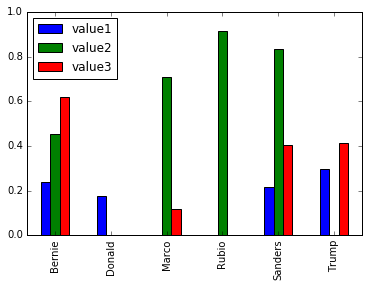

In [695]:
pd.concat([df1, df2, df3], axis = 1).plot(kind = "bar")

<hr>

# More information

This 2012 video is a bit outdated, but it still worth going through. Wes McKinney (creator of Pandas) uses Python 2.7, and the syntax has evolved just a little, so you might not be able to reproduce examples exactly. But it is not hard to figure out what you need to change.


https://www.youtube.com/watch?v=w26x-z-BdWQ


Wes McKinney's "Python for Data Analysis" is also quite interesting, but most of the information is available in the documentation website: 

http://pandas.pydata.org/pandas-docs/stable/

Be sure to check out, at the very least, "10 Minutes To Pandas".

I also recommend the Visualization chapter: http://pandas.pydata.org/pandas-docs/stable/visualization.html.